In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

RUNNING MORE TESTS, TO CHECK COLINIARITY AND IF TO INCLUDE EXTRA PREDICTORS

In [11]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
reg = smf.ols('Sales ~ TV + Radio + Newspaper', data=advertising).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        11:50:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
sm.stats.anova_lm(reg, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
TV,1.0,3314.618167,3314.618167,1166.730757,1.809337e-84
Radio,1.0,1545.616603,1545.616603,544.050126,1.882722e-58
Newspaper,1.0,0.088717,0.088717,0.031228,8.599151e-01
Residual,196.0,556.825263,2.840945,NaN,NaN


In [5]:
sm.stats.anova_lm(reg, typ=2)

,sum_sq,df,F,PR(>F)
TV,3058.010016,1.0,1076.405837,1.509960e-81
Radio,1361.736549,1.0,479.325170,1.505339e-54
Newspaper,0.088717,1.0,0.031228,8.599151e-01
Residual,556.825263,196.0,NaN,NaN


In [10]:
reg = smf.ols('Sales ~ Radio + Newspaper', data=advertising).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     49.11
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           4.96e-18
Time:                        11:50:51   Log-Likelihood:                -573.24
No. Observations:                 200   AIC:                             1152.
Df Residuals:                     197   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1889      0.628     14.640      0.000       7.951      10.427
Radio          0.1990      0.022      9.101      0.000       0.156       0.242
Newspaper      0.0066      0.015      0.446      0.656      -0.023       0.036
==============================================================================
Omnibus:                       19.261   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.768
Skew:                          -0.765   Prob(JB):                     1.88e-05
Kurtosis:                       3.519   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
reg = smf.ols('Sales ~ Radio + TV', data=advertising).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           4.83e-98
Time:                        11:52:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
TV             0.0458      0.001     32.909      0.000       0.043       0.048
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>BASIC PLOTS

<h4> Scatter plot with line on the mean

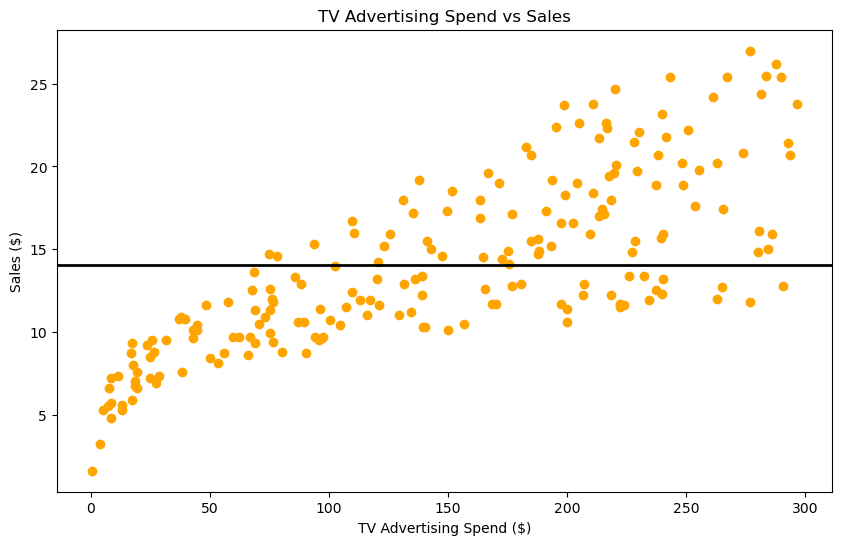

In [17]:

mean_sales = advertising['Sales'].mean()

# Scatter plot with TV as X and Sales as Y
plt.figure(figsize=(10,6))
plt.scatter(advertising['TV'], advertising['Sales'], color='orange')
plt.title("TV Advertising Spend vs Sales")
plt.xlabel("TV Advertising Spend ($)")
plt.ylabel("Sales ($)")
plt.axhline(y=mean_sales, color='black', linestyle='-', linewidth=2, label=f'Mean Sales = {mean_sales:.2f}')

# Show plot
plt.show()

<h4> Scatter plot with simple linear regression line - TV as predictor

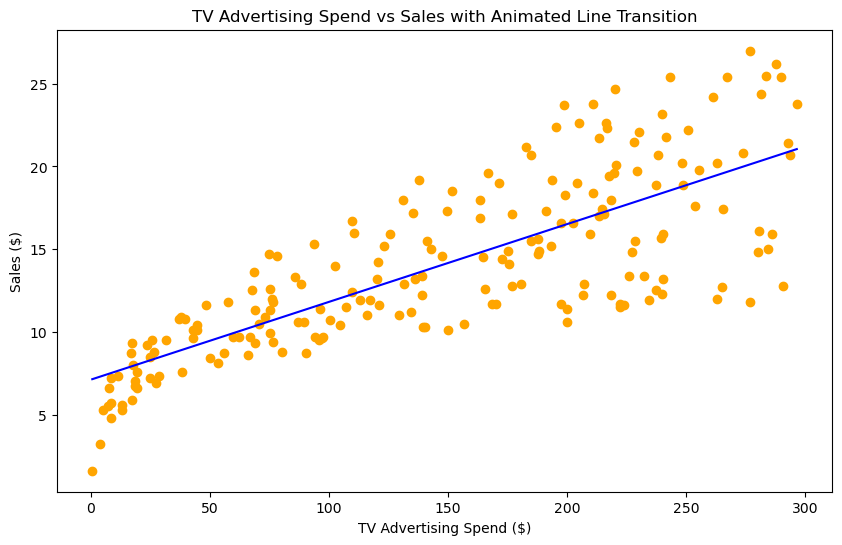

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Assuming you already have the 'advertising' DataFrame

# Calculate the mean of Sales
mean_sales = advertising['Sales'].mean()

# Linear regression line (y = mx + b)
# Calculate slope (m) and intercept (b)
m, b = np.polyfit(advertising['TV'], advertising['Sales'], 1)

# Setup figure and scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(advertising['TV'], advertising['Sales'], color='orange')
ax.set_title("TV Advertising Spend vs Sales with Animated Line Transition")
ax.set_xlabel("TV Advertising Spend ($)")
ax.set_ylabel("Sales ($)")

# Initialize the line with the mean
line, = ax.plot(advertising['TV'], [mean_sales]*len(advertising['TV']), color='blue')

# Define animation function
def animate(i):
    slope = (m / 100) * i  # Incrementally increase the slope
    intercept = mean_sales + (b - mean_sales) * (i / 100)  # Adjust the intercept gradually
    line.set_ydata(slope * advertising['TV'] + intercept)  # Update the line data
    return line,

# Animate over 100 frames
ani = FuncAnimation(fig, animate, frames=100, interval=50)

# Save animation as a GIF or MP4 file
ani.save("linear_regression_animation.gif", writer=PillowWriter(fps=20))

# Show plot
plt.show()


<h4>1 degreee multiple linear regression - TV + Radio as predictor

In [45]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming the 'advertising' DataFrame is already loaded with TV, Radio, and Sales data

# Extract TV, Radio, and Sales data for plotting
X = advertising[['TV', 'Radio']]  # Features (TV, Radio)
y = advertising['Sales']  # Target (Sales)

# Fit the linear regression model (degree = 1, no polynomial terms)
model = LinearRegression()
model.fit(X, y)

# Predict the corresponding Sales values using the linear model
y_pred = model.predict(X)

# Create a grid of TV and Radio values for the 3D plot
tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 100)
radio_range = np.linspace(X['Radio'].min(), X['Radio'].max(), 100)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Create a new dataset for the grid points (flatten the grid)
X_grid = np.column_stack([tv_grid.ravel(), radio_grid.ravel()])

# Predict the Sales for the grid points using the fitted linear model
y_grid_pred = model.predict(X_grid)

# Reshape the predicted sales to match the shape of the TV and Radio grid
y_grid_pred = y_grid_pred.reshape(tv_grid.shape)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(z=y_grid_pred, x=tv_grid, y=radio_grid, colorscale='Viridis', opacity=0.7)])

# Add the original data points as scatter points
fig.add_trace(go.Scatter3d(x=X['TV'], y=X['Radio'], z=y, mode='markers', marker=dict(size=4, color='orange'), name='Original Data'))

# Update layout for better visualization
fig.update_layout(
    title="Linear Regression with TV and Radio (Straight Plane)",
    scene=dict(
        xaxis_title="TV Advertising Spend ($)",
        yaxis_title="Radio Advertising Spend ($)",
        zaxis_title="Sales ($)"
    ),
    width=800,
    height=600
)

# Show the plot
fig.show()

# Calculate and print R² and adjusted R²
r2 = r2_score(y, y_pred)
n = len(y)  # Number of data points
p = X.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")

# Print the linear regression equation
intercept = model.intercept_
coefficients = model.coef_

equation = f"Sales = {intercept:.4f} + ({coefficients[0]:.4f} * TV) + ({coefficients[1]:.4f} * Radio)"
print("Linear Regression Equation (TV and Radio):")
print(equation)


/opt/anaconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



R²: 0.8972
Adjusted R²: 0.8962
Linear Regression Equation (TV and Radio):
Sales = 2.9211 + (0.0458 * TV) + (0.1880 * Radio)


<h4>POLYNOMIAL REGRESSION LINE, no limits on degree (not useful, just left this here for reference)

just TV as predictor

In [32]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.interpolate import make_interp_spline

# Assuming the 'advertising' DataFrame is already loaded with TV, Radio, Newspaper, and Sales data

# Remove duplicates by averaging the Sales values for duplicate TV values
advertising_cleaned = advertising.groupby('TV').mean().reset_index()

# Extract TV and Sales data for plotting
x = advertising_cleaned['TV'].values  # TV as the x-axis
y = advertising_cleaned['Sales'].values  # Sales as the y-axis

# Smoothing the Sales data using scipy's make_interp_spline
x_smooth = np.linspace(x.min(), x.max(), 300)  # More points for smoothness
spl = make_interp_spline(x, y, k=3)  # k=3 for cubic spline smoothing
y_smooth = spl(x_smooth)

# Create the figure
fig = go.Figure()

# Add the original Sales vs TV data
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Original Sales Data'))

# Add the smoothed Sales data
fig.add_trace(go.Scatter(x=x_smooth, y=y_smooth, mode='lines', name='Smoothed Sales Data'))

# Update layout for better visualization
fig.update_layout(
    title="Sales vs TV Advertising Spend with Smoothing",
    xaxis_title="TV Advertising Spend ($)",
    yaxis_title="Sales ($)",
    showlegend=True,
    width=800,
    height=600
)

# Show the plot
fig.show()



<H3>QUADRATIC

<H4> Just TV as predictor

In [34]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming the 'advertising' DataFrame is already loaded with TV, Radio, Newspaper, and Sales data

# Extract TV and Sales data for plotting
X = advertising[['TV']]  # Features (TV)
y = advertising['Sales']  # Target (Sales)

# Polynomial transformation (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the quadratic regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate new x values (TV) for a smooth curve
x_new = np.linspace(X.min(), X.max(), 300)
x_new_poly = poly.transform(x_new)

# Predict the corresponding y values (Sales) using the quadratic model
y_new = model.predict(x_new_poly)

# Create the figure
fig = go.Figure()

# Add the original Sales vs TV data
fig.add_trace(go.Scatter(x=X.squeeze(), y=y, mode='markers', name='Original Sales Data'))

# Add the smoothed quadratic Sales data
fig.add_trace(go.Scatter(x=x_new.squeeze(), y=y_new, mode='lines', name='Quadratic Fit (Degree 2)'))

# Update layout for better visualization
fig.update_layout(
    title="Sales vs TV Advertising Spend with Quadratic Fit (Degree 2)",
    xaxis_title="TV Advertising Spend ($)",
    yaxis_title="Sales ($)",
    showlegend=True,
    width=800,
    height=600
)

# Show the plot
fig.show()


/opt/anaconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



<H4> QUADRATIC - TV + Radio as predictor

In [43]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming the 'advertising' DataFrame is already loaded with TV, Radio, and Sales data

# Extract TV, Radio, and Sales data for plotting
X = advertising[['TV', 'Radio']]  # Features (TV, Radio)
y = advertising['Sales']  # Target (Sales)

# Polynomial transformation (degree 2) for quadratic regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the quadratic regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the corresponding Sales values using the quadratic model
y_pred = model.predict(X_poly)

# Create a grid of TV and Radio values for the 3D plot
tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 100)
radio_range = np.linspace(X['Radio'].min(), X['Radio'].max(), 100)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Create a new dataset for the grid points (flatten the grid)
X_grid = np.column_stack([tv_grid.ravel(), radio_grid.ravel()])
X_grid_poly = poly.transform(X_grid)

# Predict the Sales for the grid points using the fitted quadratic model
y_grid_pred = model.predict(X_grid_poly)

# Reshape the predicted sales to match the shape of the TV and Radio grid
y_grid_pred = y_grid_pred.reshape(tv_grid.shape)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(z=y_grid_pred, x=tv_grid, y=radio_grid, colorscale='Viridis', opacity=0.7)])

# Add the original data points as scatter points
fig.add_trace(go.Scatter3d(x=X['TV'], y=X['Radio'], z=y, mode='markers', marker=dict(size=4, color='orange'), name='Original Data'))

# Update layout for better visualization
fig.update_layout(
    title="Quadratic Regression with TV and Radio",
    scene=dict(
        xaxis_title="TV Advertising Spend ($)",
        yaxis_title="Radio Advertising Spend ($)",
        zaxis_title="Sales ($)"
    ),
    width=800,
    height=600
)

# Show the plot
fig.show()

# Calculate and print R² and adjusted R²
r2 = r2_score(y, y_pred)
n = len(y)  # Number of data points
p = X_poly.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")

# Extract the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Get the feature names
poly_feature_names = poly.get_feature_names_out(['TV', 'Radio'])

# Construct the equation
equation = f"Sales = {intercept:.4f} "
for coef, name in zip(coefficients, poly_feature_names):
    if abs(coef) > 0.0001:  # Exclude near-zero coefficients for readability
        equation += f"+ ({coef:.4f} * {name}) "

# Print the quadratic regression equation
print("Quadratic Regression Equation (TV and Radio):")
print(equation)


/opt/anaconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



R²: 0.9860
Adjusted R²: 0.9856
Quadratic Regression Equation (TV and Radio):
Sales = 5.1944 + (0.0510 * TV) + (0.0265 * Radio) + (-0.0001 * TV^2) + (0.0011 * TV Radio) + (0.0002 * Radio^2) 


<h3> CUBIC GRAPHS

<H4> just Tv as predictor

In [38]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming the 'advertising' DataFrame is already loaded with TV, Radio, Newspaper, and Sales data

# Extract TV and Sales data for plotting
X = advertising[['TV']]  # Features (TV)
y = advertising['Sales']  # Target (Sales)

# Polynomial transformation (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the cubic regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the corresponding y values using the cubic model
y_pred = model.predict(X_poly)

# Calculate R²
r2 = r2_score(y, y_pred)

# Calculate adjusted R²
n = len(y)  # number of data points
p = X_poly.shape[1]  # number of predictors (including polynomial terms)
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Generate new x values (TV) for a smooth curve
x_new = np.linspace(X.min(), X.max(), 300)
x_new_poly = poly.transform(x_new)

# Predict the corresponding y values (Sales) using the cubic model for new x values
y_new = model.predict(x_new_poly)

# Create the figure
fig = go.Figure()

# Add the original Sales vs TV data
fig.add_trace(go.Scatter(x=X.squeeze(), y=y, mode='markers', name='Original Sales Data'))

# Add the smoothed cubic Sales data
fig.add_trace(go.Scatter(x=x_new.squeeze(), y=y_new, mode='lines', name='Cubic Fit (Degree 3)'))

# Update layout for better visualization
fig.update_layout(
    title="Sales vs TV Advertising Spend with Cubic Fit (Degree 3)",
    xaxis_title="TV Advertising Spend ($)",
    yaxis_title="Sales ($)",
    showlegend=True,
    width=800,
    height=600
)

# Show the plot
fig.show()

# Display R² and Adjusted R²
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")

# Extract the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Get the feature names
poly_feature_names = poly.get_feature_names_out(['TV'])

# Construct the equation
equation = f"Sales = {intercept:.4f} "
for coef, name in zip(coefficients, poly_feature_names):
    equation += f"+ ({coef:.4f} * {name}) "

# Display the equation
print("Cubic Regression Equation:")
print(equation)


/opt/anaconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



R²: 0.6220
Adjusted R²: 0.6142
Cubic Regression Equation:
Sales = 5.4201 + (0.0000 * 1) + (0.0964 * TV) + (-0.0003 * TV^2) + (0.0000 * TV^3) 


<h4>Tv and Radio as predictor

In [41]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming the 'advertising' DataFrame is already loaded with TV, Radio, and Sales data

# Extract TV, Radio, and Sales data for plotting
X = advertising[['TV', 'Radio']]  # Features (TV, Radio)
y = advertising['Sales']  # Target (Sales)

# Polynomial transformation (degree 3) for TV and Radio
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the cubic regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the corresponding Sales values using the cubic model
y_pred = model.predict(X_poly)

# Create a grid of TV and Radio values for the 3D plot
tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 100)
radio_range = np.linspace(X['Radio'].min(), X['Radio'].max(), 100)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Create a new dataset for the grid points (flatten the grid)
X_grid = np.column_stack([tv_grid.ravel(), radio_grid.ravel()])
X_grid_poly = poly.transform(X_grid)

# Predict the Sales for the grid points using the fitted cubic model
y_grid_pred = model.predict(X_grid_poly)

# Reshape the predicted sales to match the shape of the TV and Radio grid
y_grid_pred = y_grid_pred.reshape(tv_grid.shape)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(z=y_grid_pred, x=tv_grid, y=radio_grid, colorscale='Viridis', opacity=0.7)])

# Add the original data points as scatter points
fig.add_trace(go.Scatter3d(x=X['TV'], y=X['Radio'], z=y, mode='markers', marker=dict(size=4, color='orange'), name='Original Data'))

# Update layout for better visualization
fig.update_layout(
    title="Cubic Regression with TV and Radio",
    scene=dict(
        xaxis_title="TV Advertising Spend ($)",
        yaxis_title="Radio Advertising Spend ($)",
        zaxis_title="Sales ($)"
    ),
    width=800,
    height=600
)

# Show the plot
fig.show()

# Calculate and print R² and adjusted R²
r2 = r2_score(y, y_pred)
n = len(y)  # Number of data points
p = X_poly.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")

equation = f"Sales = {intercept:.4f} "
for coef, name in zip(coefficients, poly_feature_names):
    equation += f"+ ({coef:.4f} * {name}) "

# Print the cubic regression equation
print("Cubic Regression Equation (TV and Radio):")
print(equation)



/opt/anaconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



R²: 0.9912
Adjusted R²: 0.9907
Cubic Regression Equation (TV and Radio):
Sales = 4.2829 + (0.0000 * 1) + (0.0854 * TV) + (0.0425 * Radio) + (-0.0004 * TV^2) + (0.0012 * TV Radio) + (-0.0008 * Radio^2) + (0.0000 * TV^3) + (-0.0000 * TV^2 Radio) + (-0.0000 * TV Radio^2) + (0.0000 * Radio^3) 


<h4> Cleaned equation</h4>

Sales = 4.2829 + (0.0854 * TV) + (0.0425 * Radio) + (-0.0004 * TV^2) + (0.0012 * TV * Radio) + (-0.0008 * Radio^2)
